In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-reg-visual/Social_Network_Ads.csv


# Decision Surface

Classification in machine learning means to train your data to assign labels to the input examples.


Each input feature defining an axis on a feature space. A plane is defined by minimum two input features, with dots representing input coordinates in the input space. If there were three input variables, the feature space would be a three-dimensional volume.

The goal of a classification algorithm is to learn how to divide up the feature space such that labels are assigned correctly to points in the feature space, or at least, as correctly as is possible.

This is a useful geometric understanding of classification predictive modeling. We can take it one step further.

Once a classification machine learning algorithm divides a feature space, we can then classify each point in the feature space, on some arbitrary grid, to get an idea of how exactly the algorithm chose to divide up the feature space.

This is called a decision surface or decision boundary, and it provides a diagnostic tool for understanding a model on a classification predictive modeling task.

Although the notion of a “surface” suggests a two-dimensional feature space, the method can be used with feature spaces with more than two dimensions, where a surface is created for each pair of input features.

In [32]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Generate dataset

I will use the `make_blobs()` function within the `datasets` class from the `sklearn` library to generate a custom dataset. Doing so would focus on the implementations rather than cleaning the data. However, the steps are the same and is a common pattern. 

Let's start by defining the dataset variables with 1000 samples and only two featues and a standard deviation of 3 for simplisity sake.

In [33]:
X, y = datasets.make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 1, cluster_std = 3)

Once dataset generated, hence we can plot a scatter plot to see the variability between variables

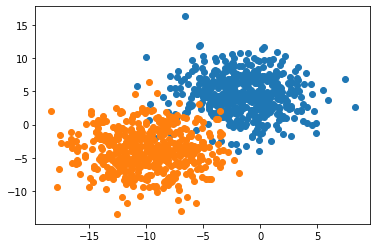

In [34]:
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

Here we iterated over the dataset and plotted a point between each `X` and `y` colored by a class label. In the next step, we need to build a predictive classification model to predict the class of unseen points. A logistic regression could be used in this case since we have only two classes. 

In [35]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [36]:
# fit the regressor into X and y
regressor.fit(X, y)

LogisticRegression()

In [37]:
# apply the predict method 
y_pred = regressor.predict(X)

All `y_pred` could be evaluated using the `accuracy_score` class from `sklearn`

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y, y_pred)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.972


# Generating decision surface

`matplotlib` provides a haby function called `contour()` which can interpolate the colors between points. However, as the documentation mentioned, we need to define the grid of points `X` of `y` in the feature space. To do this, we find the maximum value and minimum value of each feature then increase by one to make sure that the whole space is covered


In [39]:
min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1 #1st feature
min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1 #2nd feature

Then we can define the cordinates scale using the `arange()` function from the `numpy` library with a`0.01` resolution to get the scale.

In [40]:
x1_scale = np.arange(min1, max1, 0.1)
x2_scale = np.arange(min2, max2, 0.1)


The next step is to convert `x1_scale` and `x2_scale` into a grid. The function `meshgrid()` within the `numpy` library is what we need.

In [41]:
x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)

If we take a look at the generated `x_grid`, you will find that it is an array of array. So to be able to use it, we need to flatten it using the `flatten()` method from `numpy` library

In [42]:
# flatten each grid to a vector
x_g, y_g = x_grid.flatten(), y_grid.flatten()
x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))


Finally, stacking the vectors side by side as columns in an input dataset, e.g. like our original training dataset, but at a much higher resolution.

In [43]:
grid = np.hstack((x_g, y_g))


Now, we can fit into the model to predict values.

In [44]:
# y_pred_2 = regressor.predict(grid)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
y_pred_2 = model.predict(grid)
p_pred = model.predict_proba(grid)
# keep just the probabilities for class 0
p_pred = p_pred[:, 0]

In [45]:
p_pred.shape
pp_grid = p_pred.reshape(x_grid.shape)

We have a grid of values across the feature space and the class labels as predicted by our model.

Next, we need to plot the grid of values as a contour plot.

The `contourf()` function takes separate grids for each axis, just like what was returned from our prior call to `meshgrid()`. 

So we can use `x_grid` and `y_grid` that we prepared earlier and simply reshape the predictions (`y_pred`) from the model to have the same shape.

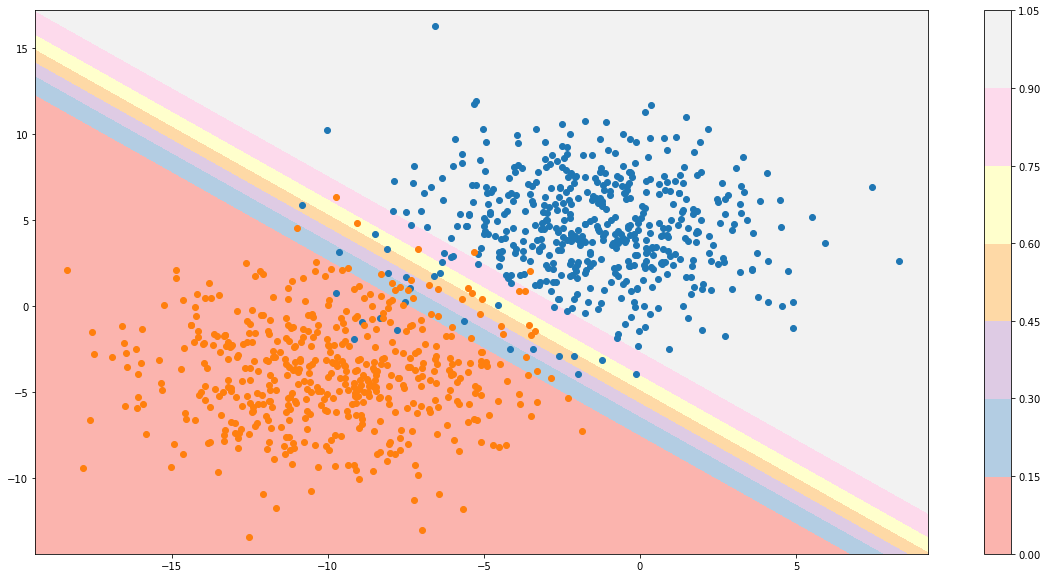

In [48]:

plt.figure(figsize=(20,10))
# plot the grid of x, y and z values as a surface
surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Pastel1')
plt.colorbar(surface)
# create scatter plot for samples from each class
for class_value in range(2):
# get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Pastel1')
# show the plot
plt.show()

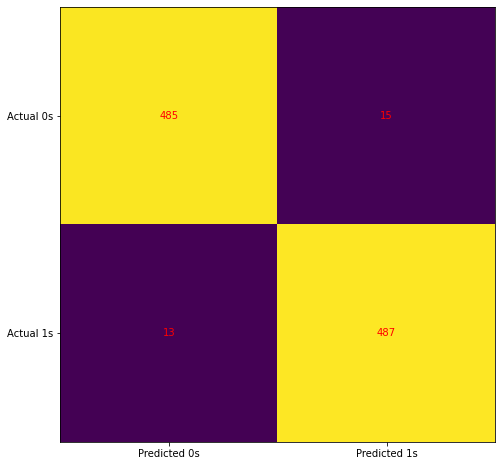

In [49]:

cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.rcParams["font.size"] = "20"
plt.show()

# Apply to real data

Now it is time to apply the previous steps to a real data to connect everything with each other. I will use the 

# Importing the dataset

In [50]:
import pandas as pd
dataset = pd.read_csv('../input/logistic-reg-visual/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [51]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Split the dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling

We need this step because `Age` and `salary` is not on the same scale

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicting a new result

In [55]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


It gave a result of category `0` means that the model predicts that a person with age of `30` years with a salary of `87000` won't purchase the car.

# Predicting the Test set results

In [56]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

# Visualising the results
## 1. Confusion matrix

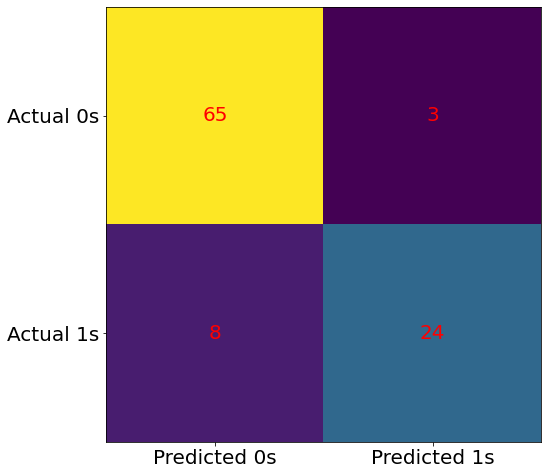

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.rcParams["font.size"] = "30"
plt.show()

## 2. decision surface - training results

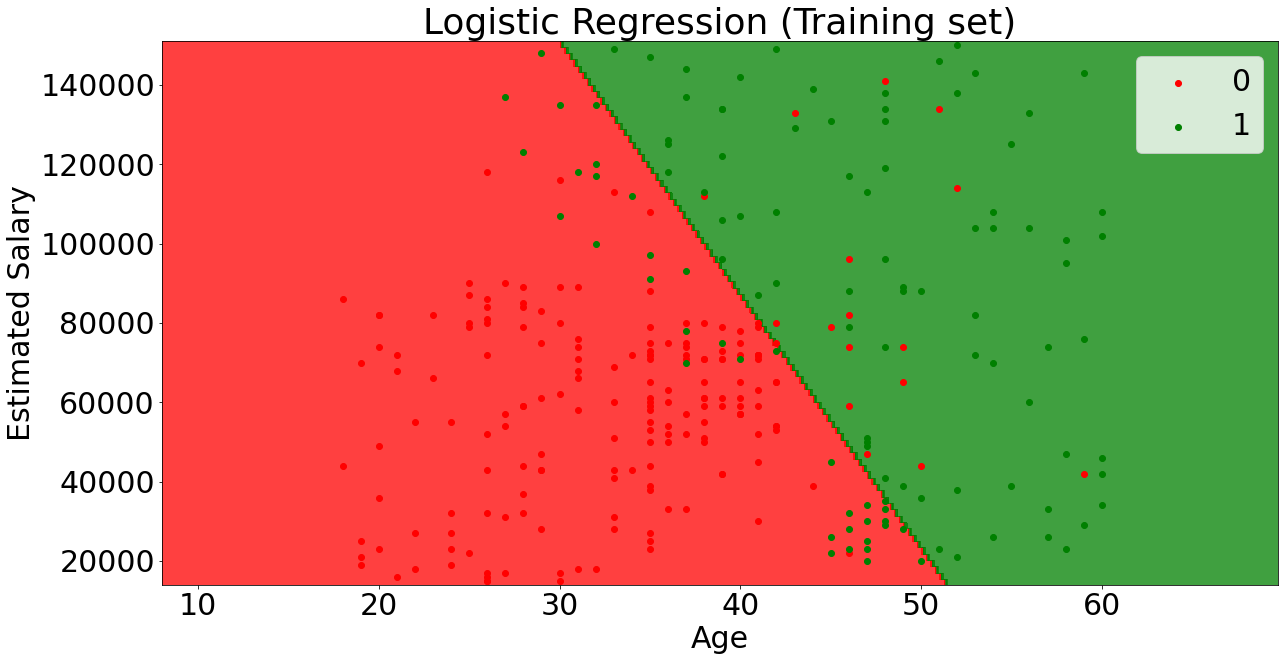

In [61]:
from matplotlib.colors import ListedColormap

#1. reverse the standard scaler on the X_train
X_set, y_set = sc.inverse_transform(X_train), y_train

#2. Generate decision surface boundaries
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10 # for Age
min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000 # for salary 

#3. Set coordinates scale accuracy
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#4. Convert into vector 
X1, X2 = np.meshgrid(x_scale, y_scale)

#5. Flatten X1 and X2 and return the output as a numpy array
X_flatten = np.array([X1.ravel(), X2.ravel()])

#6. Transfor the results into it's original form before scaling
X_transformed = sc.transform(X_flatten.T)

#7. Generate the prediction and reshape it to the X to have the same shape
Z_pred = classifier.predict(X_transformed).reshape(X1.shape)

#8. set the plot size
plt.figure(figsize=(20,10))

#9. plot the contour function
plt.contourf(X1, X2, Z_pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


#10. setting the axes limit
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#11. plot the points scatter plot ( [salary, age] vs. predicted classification based on training set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
#12. plot labels and adjustments
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualize the decision surface for the test set

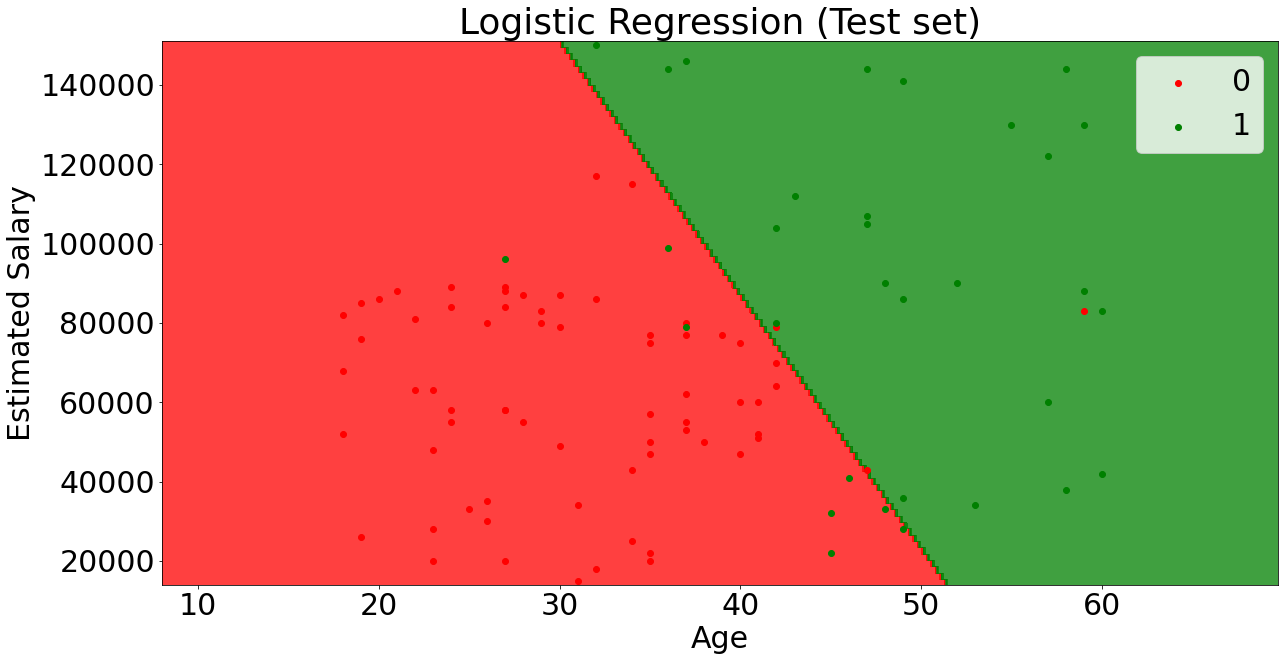

In [62]:
#1. reverse the standard scaler on the X_test
X_set, y_set = sc.inverse_transform(X_test), y_test

#2. Generate decision surface boundaries
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10 # for Age
min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000 # for salary 

#3. Set coordinates scale accuracy
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#4. Convert into vector 
X1, X2 = np.meshgrid(x_scale, y_scale)

#5. Flatten X1 and X2 and return the output as a numpy array
X_flatten = np.array([X1.ravel(), X2.ravel()])

#6. Transfor the results into it's original form before scaling
X_transformed = sc.transform(X_flatten.T)

#7. Generate the prediction and reshape it to the X to have the same shape
Z_pred = classifier.predict(X_transformed).reshape(X1.shape)

#8. set the plot size
plt.figure(figsize=(20,10))

#9. plot the contour function
plt.contourf(X1, X2, Z_pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


#10. setting the axes limit
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#11. plot the points scatter plot ( [salary, age] vs. predicted classification based on training set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
#12. plot labels and adjustments
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()